# Algorithm Performance Data Analysis - Run 2

Test Parameters 

| | QuadTreeThreshold | AllowedExceedingThreshold | 
| --- | --- | --- | 
| min | 100 | 0 | 
| max | 130 | 0.0100 | 
| step| 1 | 0.0001 | 
| iteration | 31 | 101 | 

In [1]:
# Import relevant modules 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

# Load the data
data = pd.read_csv('IndividualCompressionData_since_test_20231101_120031.csv')

In [2]:
# Inspect the data
data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231101_120031,10404007.png,502730,68697,434033,0.863352,20,13,61265,9572,51693,0.843761,22.999145,2716.837264,13.790167,100,0.00
1,2,test_20231101_120031,1254659.png,342646,125202,217444,0.634602,7,21,80080,16732,63348,0.791059,15.738857,1878.393712,15.392937,100,0.00
2,3,test_20231101_120031,10188041.png,221231,16152,205079,0.926990,3,4,41731,2264,39467,0.945748,9.145374,732.734949,19.481335,100,0.00
3,4,test_20231101_120031,10287332.png,216980,18917,198063,0.912817,3,4,22337,2561,19776,0.885347,8.568555,587.347168,20.441855,100,0.00
4,5,test_20231101_120031,11610969.png,368720,56087,312633,0.847887,2,4,84111,8069,76042,0.904067,16.248012,1779.797947,15.627097,100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31305,6,test_20231101_123617,10350842.png,212614,24,212590,0.999887,1,3,42529,1,42528,0.999976,55.226706,11938.014080,7.361483,130,0.01
31306,7,test_20231101_123617,10863862.png,317432,3492,313940,0.988999,2,3,66058,512,65546,0.992249,47.985099,9940.397579,8.156766,130,0.01
31307,8,test_20231101_123617,11382381.png,312486,287,312199,0.999082,1,4,46745,36,46709,0.999230,23.638037,2954.010965,13.426683,130,0.01
31308,9,test_20231101_123617,11079715.png,443815,104402,339413,0.764762,3,9,124136,14668,109468,0.881839,18.498517,2483.087264,14.180884,130,0.01


In [2]:
data.describe()

,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
count,31310.000000,31310.00000,31310.000000,31310.000000,31310.000000,31310.000000,31310.000000,31310.000000,31310.000000,31310.000000,31310.000000,31310.000000,31310.000000,31310.000000,31310.000000,31310.000000
mean,5.500000,321053.70000,34319.294251,286734.405749,0.907253,2.179943,3.896423,60908.400000,4786.759087,56121.640913,0.938315,20.153910,2660.667817,14.579002,115.000000,0.005000
std,2.872327,92669.85274,45720.601191,77851.538722,0.108988,1.243235,1.202953,27852.802254,6293.953238,22715.979075,0.057733,7.580636,1661.376832,2.478695,8.944415,0.002916
min,1.000000,212614.00000,24.000000,197125.000000,0.589336,0.000000,3.000000,22337.000000,1.000000,19776.000000,0.791059,8.568555,587.347168,7.361483,100.000000,0.000000
25%,3.000000,221231.00000,4517.000000,211932.000000,0.897600,2.000000,3.000000,41731.000000,664.000000,40294.000000,0.905404,15.666971,1655.973920,12.869117,107.000000,0.002500
50%,5.500000,314959.00000,13157.000000,272774.000000,0.948249,2.000000,4.000000,54005.000000,1874.000000,49201.000000,0.957382,19.868700,2400.958539,14.326957,115.000000,0.005000
75%,8.000000,368720.00000,42379.000000,312119.000000,0.981708,3.000000,4.000000,80080.000000,6108.000000,67530.000000,0.985492,24.367449,3358.680549,15.940269,123.000000,0.007500
max,10.000000,502730.00000,182259.000000,495953.000000,0.999935,113.000000,29.000000,124136.000000,24973.000000,109468.000000,0.999988,55.226706,11938.014080,20.441855,130.000000,0.010000


## Analyze per Image

In [4]:
# Select an image
image_name = data['FileName'].iloc[0]  # Gets the first image name; replace with a specific name if needed
# Get all the test result for this image
singe_image_data = data[data['FileName'] == image_name] 

In [5]:
singe_image_data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231101_120031,10404007.png,502730,68697,434033,0.863352,20,13,61265,9572,51693,0.843761,22.999145,2716.837264,13.790167,100,0.0000
10,1,test_20231101_120032,10404007.png,502730,68697,434033,0.863352,9,4,61265,9572,51693,0.843761,22.999145,2716.837264,13.790167,100,0.0001
20,1,test_20231101_120032,10404007.png,502730,68697,434033,0.863352,3,4,61265,9572,51693,0.843761,22.999145,2716.837264,13.790167,100,0.0002
30,1,test_20231101_120033,10404007.png,502730,68697,434033,0.863352,3,4,61265,9572,51693,0.843761,22.999145,2716.837264,13.790167,100,0.0003
40,1,test_20231101_120034,10404007.png,502730,68697,434033,0.863352,3,4,61265,9572,51693,0.843761,22.999145,2716.837264,13.790167,100,0.0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31260,1,test_20231101_123615,10404007.png,502730,6777,495953,0.986520,1,4,61265,998,60267,0.983710,28.663536,4260.667227,11.836027,130,0.0096
31270,1,test_20231101_123615,10404007.png,502730,6777,495953,0.986520,1,4,61265,998,60267,0.983710,28.663536,4260.667227,11.836027,130,0.0097
31280,1,test_20231101_123616,10404007.png,502730,6777,495953,0.986520,2,5,61265,998,60267,0.983710,28.663536,4260.667227,11.836027,130,0.0098
31290,1,test_20231101_123617,10404007.png,502730,6777,495953,0.986520,2,9,61265,998,60267,0.983710,28.663536,4260.667227,11.836027,130,0.0099


In [ ]:
# # List of metrics interested in
# metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

# # Create a separate plot for each metric
# for metric in metrics:
#     plt.figure(figsize=(10, 6))
    
#     # Group by AllowedExceedingThresholdFactor and plot
#     for key, sub_group in singe_image_data.groupby('AllowedExceedingThresholdFactor'):
#         plt.plot(sub_group['QuadtreeThreshold'], sub_group[metric], label=f'Factor={key}')
    
#     plt.title(f'{image_name} - {metric}')
#     plt.xlabel('QuadtreeThreshold')
#     plt.ylabel(metric)
#     plt.legend()
#     plt.grid(True)
#     plt.show()


## Analyze per Test

In [3]:
# Group the data based on 'TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor', calculate the mean for each of them 
data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()

/var/folders/y7/s3dq5fdd6pzgms8yt_kxxqw00000gn/T/ipykernel_50828/1924922927.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()


In [4]:
data_grouped_by_test

,TestID,QuadtreeThreshold,AllowedExceedingThresholdFactor,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR
0,test_20231101_120031,100,0.0000,5.5,321053.7,52240.6,268813.1,0.857521,4.6,6.6,60908.4,7191.5,53716.9,0.902400,14.869222,1507.739129,16.736397
1,test_20231101_120032,100,0.0001,5.5,321053.7,52218.6,268835.1,0.857596,3.3,3.9,60908.4,7188.2,53720.2,0.902476,14.962914,1522.547795,16.686206
2,test_20231101_120032,100,0.0002,5.5,321053.7,52192.3,268861.4,0.857716,2.5,4.6,60908.4,7185.2,53723.2,0.902609,14.981855,1526.322970,16.662935
3,test_20231101_120033,100,0.0003,5.5,321053.7,52149.1,268904.6,0.857856,2.7,3.9,60908.4,7179.1,53729.3,0.902725,15.139079,1546.656962,16.604013
4,test_20231101_120034,100,0.0004,5.5,321053.7,52145.1,268908.6,0.857871,2.5,3.8,60908.4,7178.5,53729.9,0.902740,15.195461,1553.799560,16.580626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,test_20231101_123615,130,0.0096,5.5,321053.7,18667.0,302386.7,0.950770,1.4,3.7,60908.4,2635.6,58272.8,0.968465,29.969858,5228.813356,12.009039
3127,test_20231101_123615,130,0.0097,5.5,321053.7,18667.0,302386.7,0.950770,1.7,3.5,60908.4,2635.6,58272.8,0.968465,29.969858,5228.813356,12.009039
3128,test_20231101_123616,130,0.0098,5.5,321053.7,18616.5,302437.2,0.950932,1.6,3.9,60908.4,2629.4,58279.0,0.968579,29.987669,5233.206526,12.004840
3129,test_20231101_123617,130,0.0099,5.5,321053.7,18616.5,302437.2,0.950932,1.4,4.3,60908.4,2629.4,58279.0,0.968579,29.987669,5233.206526,12.004840


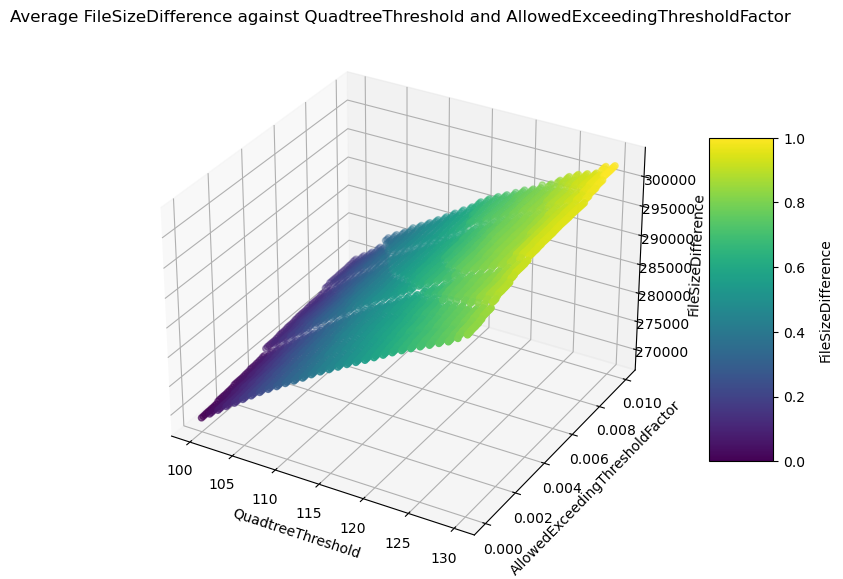

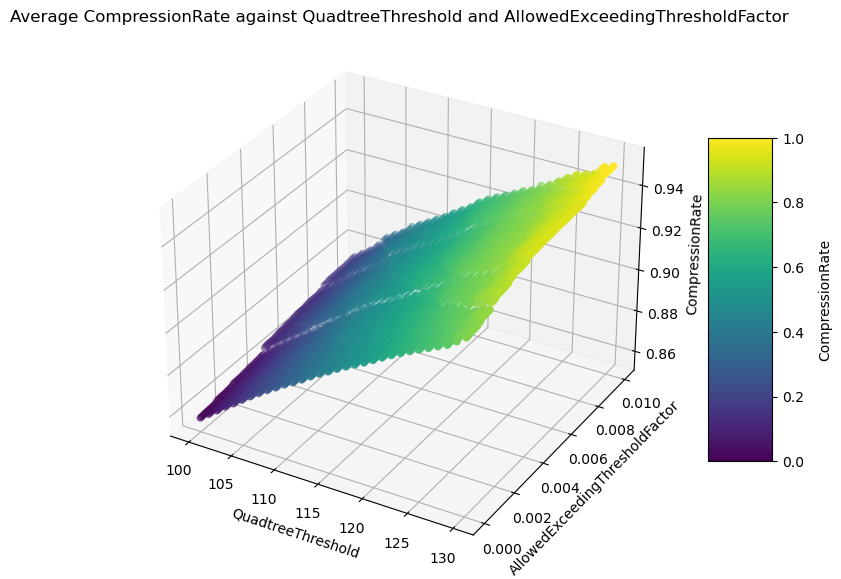

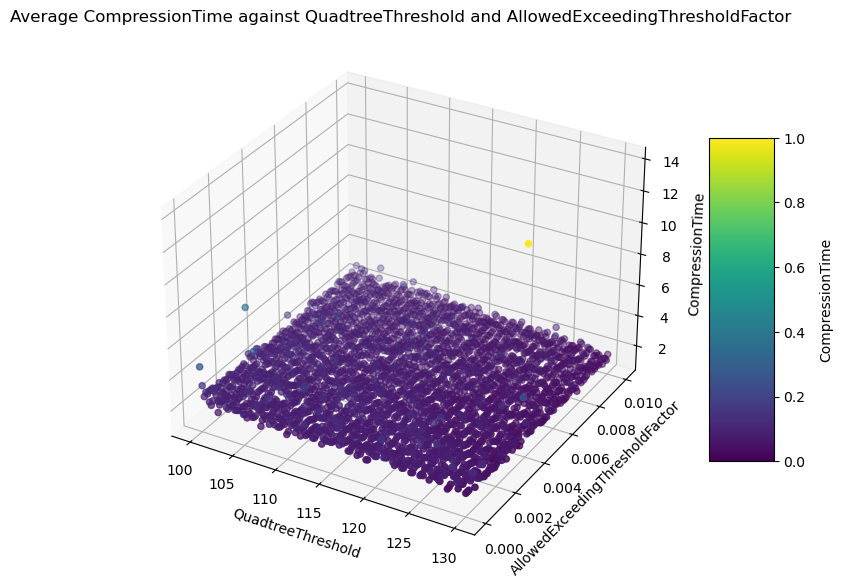

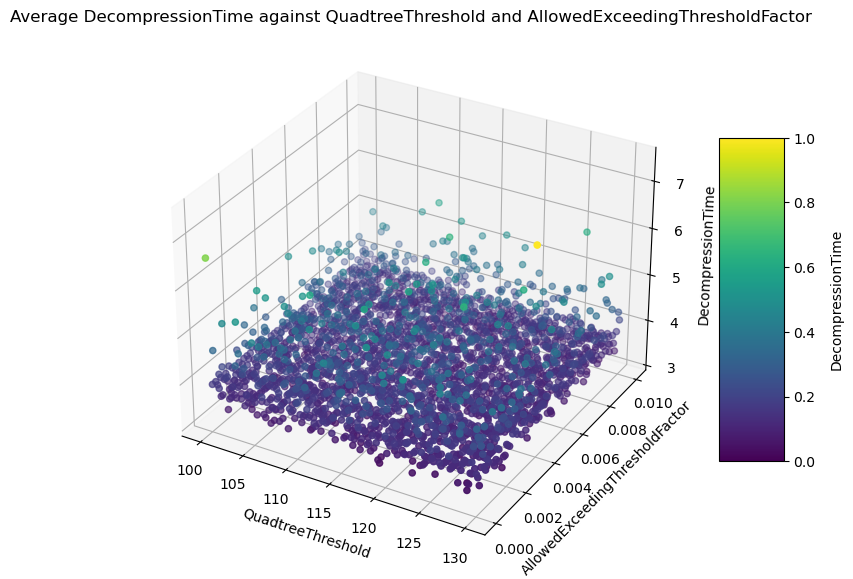

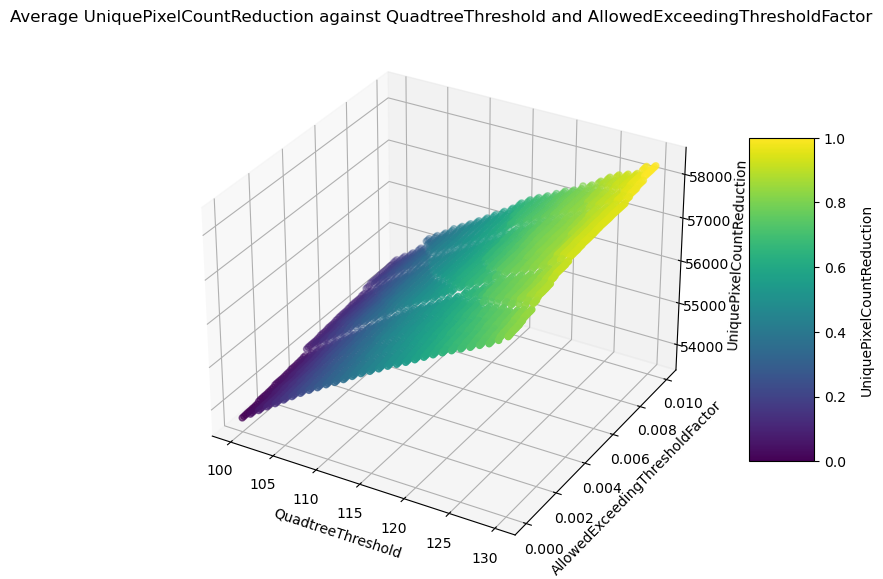

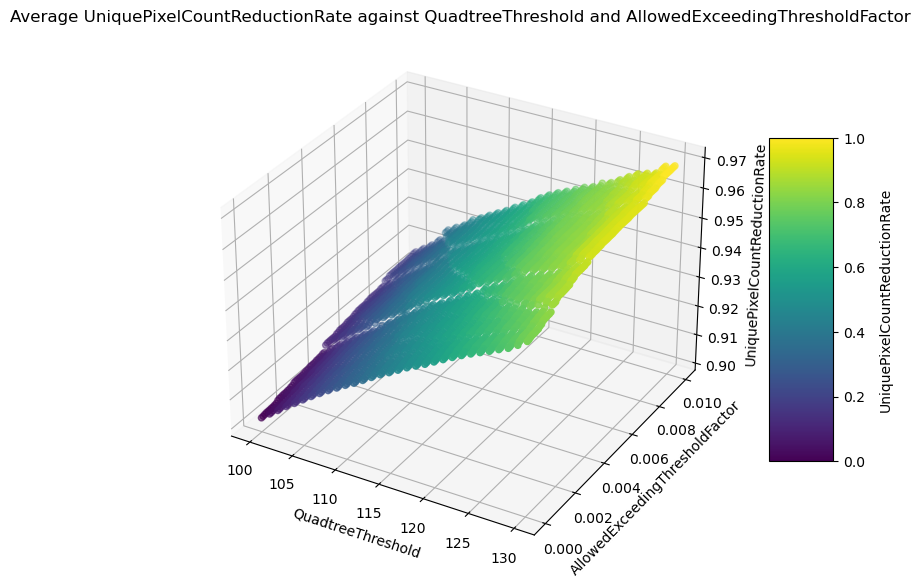

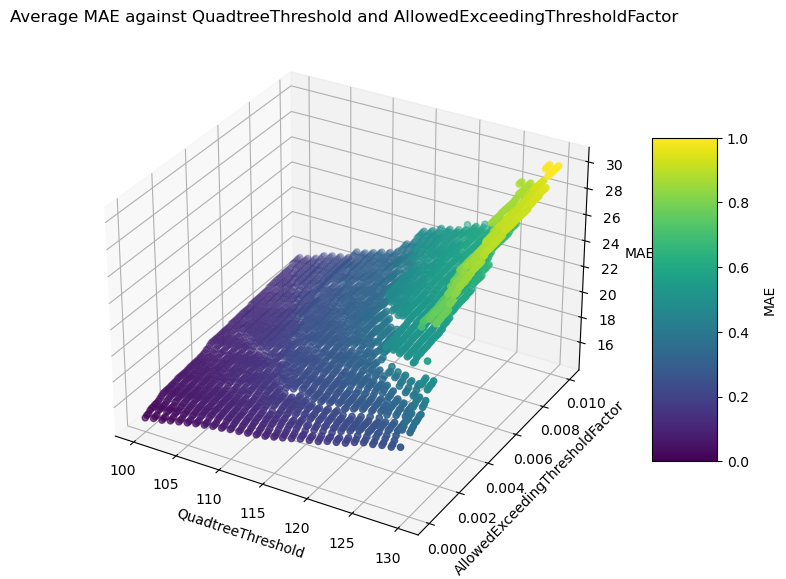

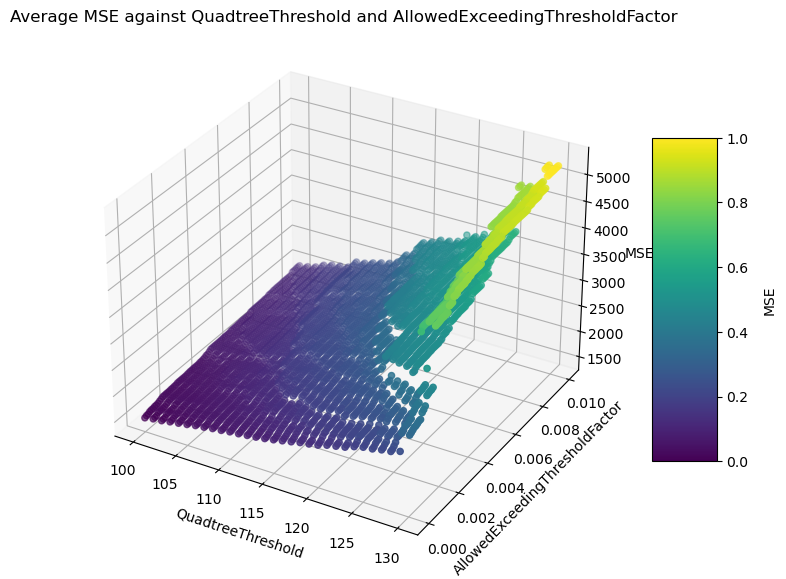

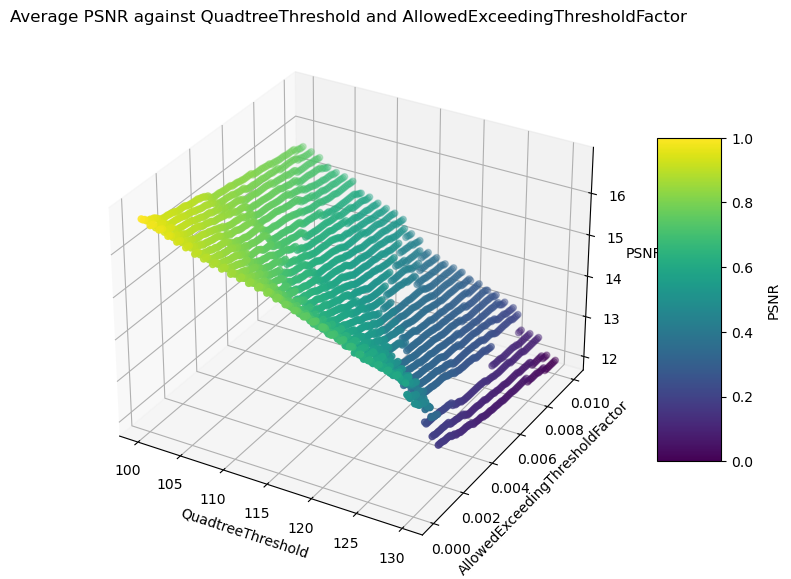

In [5]:
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

for metric in metrics:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Data for plotting
    x = data_grouped_by_test['QuadtreeThreshold']
    y = data_grouped_by_test['AllowedExceedingThresholdFactor']
    z = data_grouped_by_test[metric]
    
    # Using a colormap to represent Z values with colors
    norm = plt.Normalize(z.min(), z.max())
    colors = plt.cm.viridis(norm(z))
    sc = ax.scatter(x, y, z, c=colors)
    
    ax.set_xlabel('QuadtreeThreshold')
    ax.set_ylabel('AllowedExceedingThresholdFactor')
    ax.set_zlabel(metric)
    ax.set_title(f'Average {metric} against QuadtreeThreshold and AllowedExceedingThresholdFactor')
    
    # Adding a colorbar to the graph to indicate the scale
    cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
    cbar.set_label(metric, labelpad=10)
    
    plt.show()


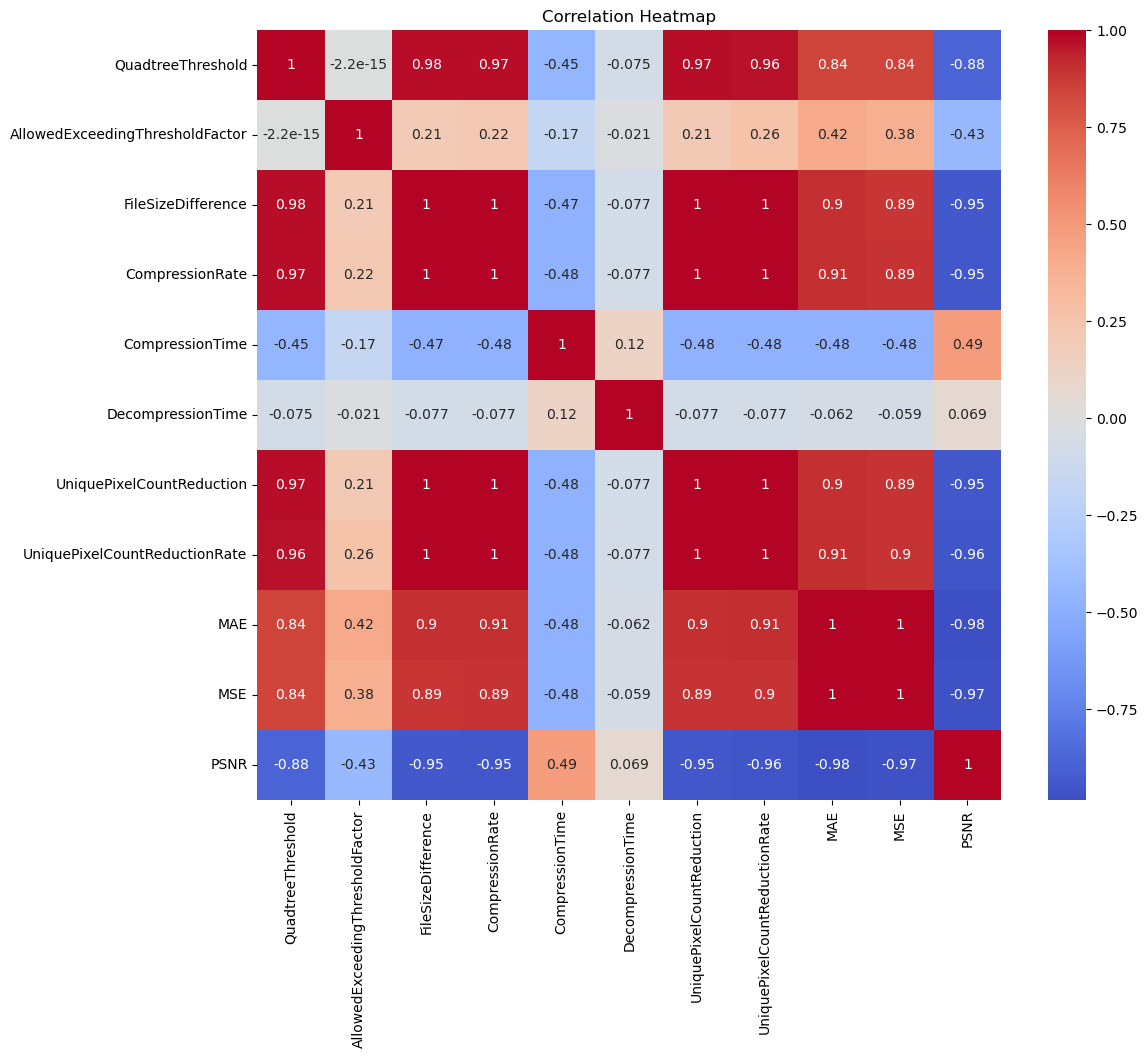

In [10]:
# Calculate the correlation matrix
correlation = data_grouped_by_test[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Score and Evaluation

In [6]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize metrics
# data_grouped_by_test['CompressionRate'] = normalize(data_grouped_by_test['CompressionRate'])
data_grouped_by_test['CompressionTime'] = normalize(data_grouped_by_test['CompressionTime'])
data_grouped_by_test['DecompressionTime'] = normalize(data_grouped_by_test['DecompressionTime'])
data_grouped_by_test['MAE'] = normalize(data_grouped_by_test['MAE'])
data_grouped_by_test['MSE'] = normalize(data_grouped_by_test['MSE'])
data_grouped_by_test['PSNR'] = normalize(data_grouped_by_test['PSNR'])

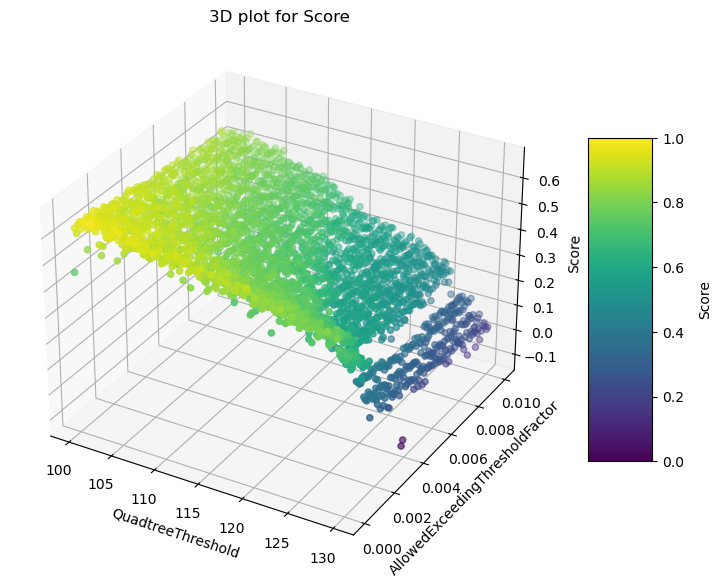

In [7]:
# Calculate LossScore
data_grouped_by_test['LossScore'] = -data_grouped_by_test['MAE'] - data_grouped_by_test['MSE'] + data_grouped_by_test['PSNR']

# Calculate the total score
data_grouped_by_test['Score'] = (5/9 * data_grouped_by_test['CompressionRate'] 
                         - 2/9 * (data_grouped_by_test['CompressionTime'] + data_grouped_by_test['DecompressionTime'])
                         + 2/9 * data_grouped_by_test['LossScore'])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data for plotting
x = data_grouped_by_test['QuadtreeThreshold']
y = data_grouped_by_test['AllowedExceedingThresholdFactor']
z = data_grouped_by_test['Score']

# Using a colormap to represent Z values (scores) with colors
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.viridis(norm(z))
sc = ax.scatter(x, y, z, c=colors)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
ax.set_title('3D plot for Score')

# Adding a colorbar to the graph
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
cbar.set_label('Score', labelpad=10)

plt.show()

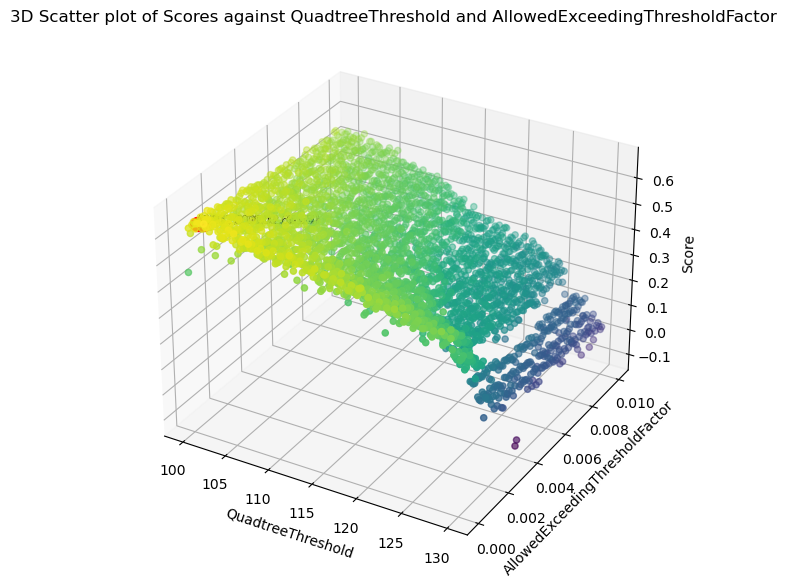

In [8]:
data_grouped_by_test = data_grouped_by_test.sort_values(by='Score', ascending=False)
top_3 = data_grouped_by_test.head(3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for all data points
ax.scatter(data_grouped_by_test['QuadtreeThreshold'], data_grouped_by_test['AllowedExceedingThresholdFactor'], data_grouped_by_test['Score'], c=data_grouped_by_test['Score'], cmap='viridis')

# Highlighting and annotating top 3 scores
for index, row in top_3.iterrows():
    ax.scatter(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], c='red', s=100)  # use larger size and red color
    label = '({}, {}, {:.2f})'.format(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'])
    ax.text(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], label, fontsize=9)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
plt.title('3D Scatter plot of Scores against QuadtreeThreshold and AllowedExceedingThresholdFactor')
plt.show()

In [9]:
# Print out the top 3
print(top_3[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'Score']])


     QuadtreeThreshold  AllowedExceedingThresholdFactor     Score
202                102                           0.0000  0.660729
102                101                           0.0001  0.648199
103                101                           0.0002  0.643121
